# Part 1: MAP

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

1.Generate 50 2D-data points using the following function:  
2.Add Gaussian random noise to the data

In [13]:
def f(x):
    return np.sin(x**2+1)

g_m=0
g_v=0.4
x = np.linspace(0,2,num=50)
y = f(x) + np.random.normal(g_m,g_v,size=50)

x_tr = np.linspace(0., 2, 500)
y_tr = f(x_tr)

3.Show the original curve line and the noisy data.

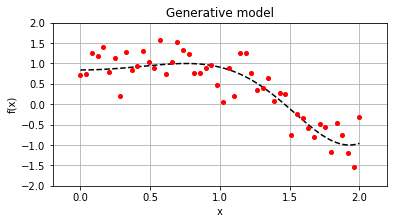

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x, y, 'or', ms=4)
ax.set_xlim(-0.2, 2.2)
ax.set_ylim(-2, 2)
ax.set_title('Generative model')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()

4.Fit the generated noisy data using the MAP as discussed in class.

In [19]:
def MAP_fitting(x,y,M,alpha):
    N=len(x)
    X=np.zeros([N,M])
    
    for n in range(0,N):
        for m in range(0,M):
            #polynomial function
            X[n,m]=np.power(x[n],m)
    XX=np.dot(X.T,X)
    X_1=XX+alpha*np.eye(M)
    iX_1=linalg.inv(X_1)
    w=np.dot(iX_1,np.dot(X.T,y))
    return w

def MAP_plot(x,w):
    M = len(w)
    N = len(x)
    X = np.zeros([N,M])
    
    for n in range(0,N):
        for m in range(0,M):
            #polynomial function
            X[n,m]=np.power(x[n],m)
    y=np.dot(X,w)
    return x,y

In [20]:
w = MAP_fitting(x,y,M=3,alpha=1)

5.Compute and display the total absolute error value (between the predicted and the correct ones) of using the computed w.

In [21]:
def Error_fun(x,y,w):
    y_predict=MAP_plot(x,w)
    error=np.sum(np.absolute(y-y_predict))
    return error

In [22]:
error = Error_fun(x,y,w)
print("Error value:%f"%error)

Error value:69.899007


6.Display the estimated values of w

In [24]:
print("W：\n",w)

W：
 [ 0.98642941  0.45720126 -0.75521807]


7.Experiment with your code by changing M and alpha (the coefficient of the regularization/prior term) to various values, and then show the plots. On each the plot, you must show the values of M and alpha. 

M=3 alpha=1


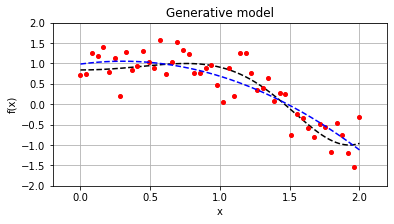

In [29]:
print("M=%d"%3+" alpha=%d"%1)
[x_ts,y_ts]=MAP_plot(x_tr,w)
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x, y, 'or', ms=4)
ax.plot(x_ts, y_ts,'--b')
ax.set_xlim(-0.2, 2.2)
ax.set_ylim(-2, 2)
ax.set_title('Generative model')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()

M=20 alpha=1


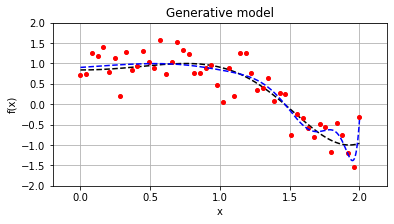

In [34]:
M=20
alpha=1
print("M=%d"%M+" alpha=%d"%alpha)
w = MAP_fitting(x,y,M,alpha)
[x_ts,y_ts]=MAP_plot(x_tr,w)
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x, y, 'or', ms=4)
ax.plot(x_ts, y_ts,'--b')
ax.set_xlim(-0.2, 2.2)
ax.set_ylim(-2, 2)
ax.set_title('Generative model')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()

M=20 alpha=0.000001


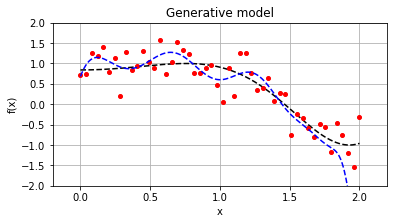

In [40]:
M=20
alpha=0.000001
print("M=%d"%M+" alpha=%f"%alpha)
w = MAP_fitting(x,y,M,alpha)
[x_ts,y_ts]=MAP_plot(x_tr,w)
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x, y, 'or', ms=4)
ax.plot(x_ts, y_ts,'--b')
ax.set_xlim(-0.2, 2.2)
ax.set_ylim(-2, 2)
ax.set_title('Generative model')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()

M=20 alpha=100.000000


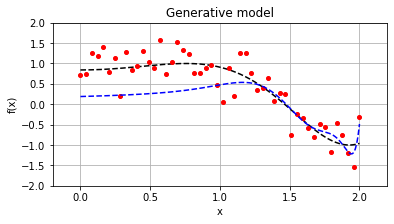

In [41]:
M=20
alpha=100
print("M=%d"%M+" alpha=%f"%alpha)
w = MAP_fitting(x,y,M,alpha)
[x_ts,y_ts]=MAP_plot(x_tr,w)
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x, y, 'or', ms=4)
ax.plot(x_ts, y_ts,'--b')
ax.set_xlim(-0.2, 2.2)
ax.set_ylim(-2, 2)
ax.set_title('Generative model')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()

8. M too small will cause under fitting
   M too big will cause over fitting
   alpha too small or too big cause over fitting